<a href="https://colab.research.google.com/github/Tiwari666/NLP/blob/main/Sentiment_Analysis_Restaurant_Reviews_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1)  Importing the dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing the dataset
path = '/content/Restaurant_Reviews.tsv'
data = pd.read_csv(path, sep='\t', quoting=3)

# quoting=3:
This parameter specifies the handling of quoting characters (like double quotes) in the CSV file. Quoting level 3 (QUOTE_NONE) means that quoting is turned off. This is useful if we have text fields that contain special characters that might otherwise interfere with the CSV parsing.

In [85]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


**Exploring Data**

In [8]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

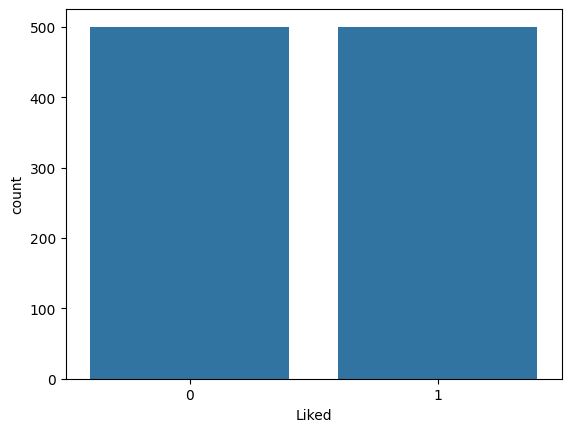

In [11]:
sns.countplot(x=data['Liked'])

In [12]:
data['Review'].apply(len).max()

149

**Preprocessing Data**

In [13]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [15]:
data.Review[0]

'Wow... Loved this place.'

In [16]:
data.Review[1]

'Crust is not good.'

In [17]:
data.Review[2]

'Not tasty and the texture was just nasty.'

#**Stemming**

only keeping the letters in the review, that means we will remove numbers, punctuations, etc

we are keeping all the smallcase and uppercase letters

data['Review'][0] --- our first review

after removing unwanted characters, the remaining charactors can form a word

so, we will replace removed charactor by space(' ')

In [30]:
review = re.sub('[^a-zA-Z]',' ',data['Review'][0])
review = review.lower()
review =review.split()
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

In [27]:
review

['wow', 'love', 'place']

In [28]:
review = ' '.join(review)

In [29]:
review

'wow love place'

In [31]:
type(review)

list

In [88]:
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',data['Review'][i]) # replace 0 by i
    review = review.lower()
    review =review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] # taking all the words in review except stop words
    review = ' '.join(review)
    corpus.append(review)

In [89]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()

In [37]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
x.shape

(1000, 1500)

In [40]:
y = data.iloc[:, 1].values

In [41]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# SPLITTING THE DATASET INTO THE TRAIN-TEST DATASET

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [43]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Logistic Regression:


In [51]:
# Fitting Logistic Regression to the Training datsset
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=2)
classifier.fit(x_train, y_train)

LogisticRegression(C=2)

In [54]:
# Predicting the Test dataset results
y_pred_lr = classifier.predict(x_test)

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print ("Confusion Matrix:\n",cm_lr)

Confusion Matrix:
 [[75 22]
 [35 68]]


In [56]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
accuracy_score_lr = accuracy_score(y_test,y_pred_lr)
precision_score_lr = precision_score(y_test,y_pred_lr)
recall_score_lr= recall_score(y_test,y_pred_lr)
print("\n")
print("Accuracy is ",round(accuracy_score_lr*100,2),"%")
print("Precision is ",round(precision_score_lr,2))
print("Recall is ",round(recall_score_lr,2))



Accuracy is  71.5 %
Precision is  0.76
Recall is  0.66


In [59]:
#detailed report showing various performance metrics of the classification model

#assessing its effectiveness in predicting the classes or categories of the test dataset

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        97
           1       0.76      0.66      0.70       103

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



# Multinomial Naive Bayes:

In [60]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha= 0.1)
classifier.fit(x_train, y_train)


MultinomialNB(alpha=0.1)

In [61]:
# Predicting the Test set results
y_pred_mnb = classifier.predict(x_test)

In [68]:
# Making the Confusion Matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print ("Confusion Matrix:\n",cm_mnb)

Confusion Matrix:
 [[73 24]
 [20 83]]


In [69]:
# Accuracy, Precision and Recall
accuracy_score_mnb = accuracy_score(y_test,y_pred_mnb)
precision_score_mnb = precision_score(y_test,y_pred_mnb)
recall_score_mnb= recall_score(y_test,y_pred_mnb)
print("\n")
print("Accuracy is ",round(accuracy_score_mnb*100,2),"%")
print("Precision is ",round(precision_score_mnb,2))
print("Recall is ",round(recall_score_mnb,2))



Accuracy is  78.0 %
Precision is  0.78
Recall is  0.81


# Bernoulli Naive Bayes:

In [64]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.5)
classifier.fit(x_train, y_train)


BernoulliNB(alpha=0.5)

In [65]:
# Predicting the Test set results
y_pred_bnb = classifier.predict(x_test)

In [67]:
# Making the Confusion Matrix
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
print ("Confusion Matrix:\n",cm_bnb)

Confusion Matrix:
 [[73 24]
 [20 83]]


In [70]:
# Accuracy, Precision and Recall
accuracy_score_bnb = accuracy_score(y_test,y_pred_bnb)
precision_score_bnb = precision_score(y_test,y_pred_bnb)
recall_score_bnb= recall_score(y_test,y_pred_bnb)
print("\n")
print("Accuracy is ",round(accuracy_score_bnb*100,2),"%")
print("Precision is ",round(precision_score_bnb,2))
print("Recall is ",round(recall_score_bnb,2))




Accuracy is  78.0 %
Precision is  0.78
Recall is  0.81


#Gaussian Naive Bayes:

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred_GNB = classifier.predict(x_test)

In [71]:
# Making the Confusion Matrix
cm_GNB = confusion_matrix(y_test, y_pred_GNB)
print ("Confusion Matrix:\n",cm_GNB)

Confusion Matrix:
 [[55 42]
 [12 91]]


In [72]:
# Accuracy, Precision and Recall
accuracy_score_GNB = accuracy_score(y_test,y_pred_GNB)
precision_score_GNB = precision_score(y_test,y_pred_GNB)
recall_score_GNB= recall_score(y_test,y_pred_GNB)
print("\n")
print("Accuracy is ",round(accuracy_score_GNB*100,2),"%")
print("Precision is ",round(precision_score_GNB,2))
print("Recall is ",round(recall_score_GNB,2))



Accuracy is  73.0 %
Precision is  0.68
Recall is  0.88


In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



# Comparing different models based on the Accuracy Result using the Bar Plot


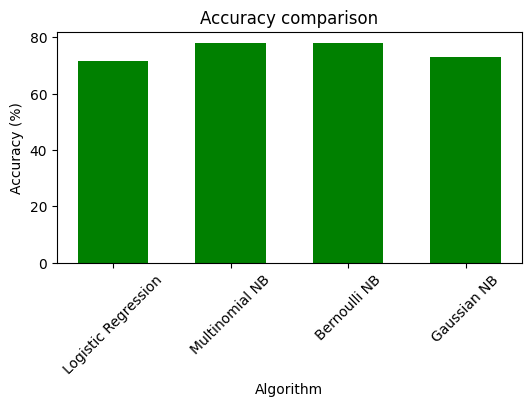

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 3))
Algorithm = ['Logistic Regression','Multinomial NB', 'Bernoulli NB','Gaussian NB']
accuracy = [ 71.5,78,78,73]
plt.bar(Algorithm,accuracy,color='g', width=0.6)
plt.ylabel('Accuracy (%)')
plt.xlabel('Algorithm')
plt.title('Accuracy comparison')
# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)
plt.show()